# Занятие 1

1. Немного про наш семестр
2. Связные списки
3. Pandas. Часть 0. Знакомство с библиотекой. ipython tips.


# Связные списки


Ещё классы можно использовать, если вам захочется написать какую-то свою структуру данных. Например, связный список. Это базовый примитив в программировании, которые часто любят использовать для демонстрации каких-нибудь алгоритмических задач. Они примечательны тем, что незваисимо от количества элементов в связном списке операция добавления элемента в начало списка всегда выполняется за некоторое (обычно небольшое) константное время



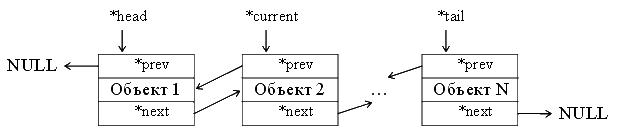

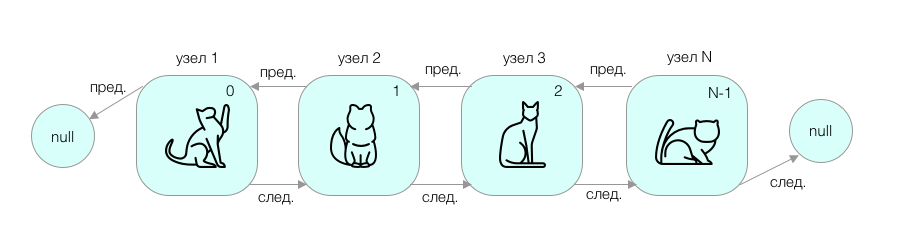

1. Проверять содержится ли в нем тот или иной элемент;
2. Добавлять узлы в конец;
3. Получать значение узла по индексу;
4. Удалять узлы.

Некоторыми преимуществами связного списка являются его прерывистый характер и время чтения, никогда не превышающее O(n). Связанный список не нужно хранить постоянно, потому что он имеет ссылки, встроенные в каждый узел, для расположения следующего по порядку. Если в памяти вашего компьютера мало места, идеально подойдет связанный список, поскольку всю структуру не нужно хранить в одном месте. Это также означает, что чтение связанного списка является линейным, поскольку размер списка приближается к бесконечности.



Простой пример односвязного списка:

Односвязный список состоит из нескольких узлов, каждый из которых содержит а) данные и б) ссылку на следующий узел.



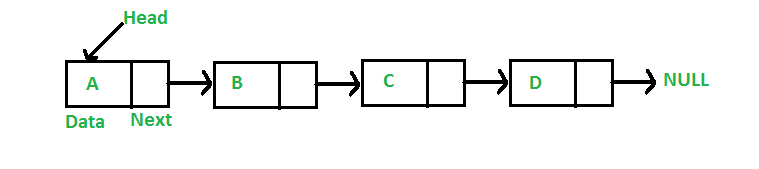

In [8]:
class Node(object):
    def __init__(self, value=None, next_node=None):
        self.value = value
        self.next = next_node

    def __str__(self):
        return f"[Node with value {self.value}]"


def print_linked_list(head):
    cur = head
    while cur is not None:
        print(cur)
        cur = cur.next

In [9]:
h, a, b, c, d = Node(1), Node(2), Node(3), Node("Внезапно"), Node(5)

h.next = a
a.next = b
b.next = c
c.next = d

print_linked_list(h)

[Node with value 1]
[Node with value 2]
[Node with value 3]
[Node with value Внезапно]
[Node with value 5]


Двухсвязный список

В двусвязном списке каждый узел содержит данные, ссылку на узел, после него, и ссылку на узел, предшествующий ему.



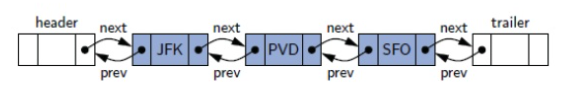

https://coderlessons.com/tutorials/python-technologies/izuchite-strukturu-dannykh-python/python-sviazannye-spiski

https://github.com/aspittel/coding-cheat-sheets/blob/master/data_structures/linked_lists.md

# ПАНДЫ

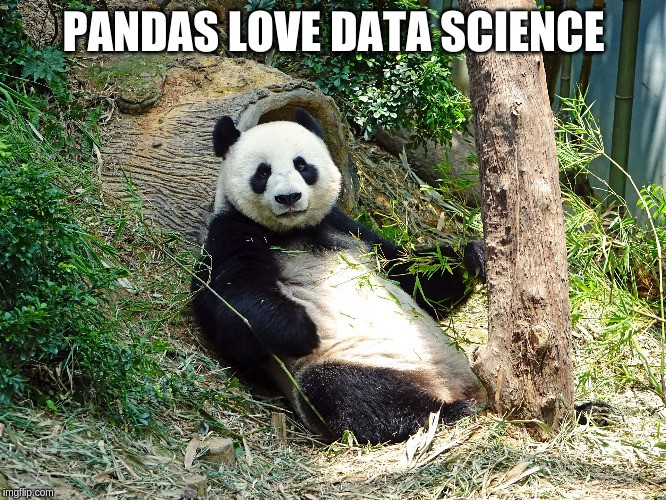

Pandas - Библиотека для анализа данных и манипяций с ними. Во многих местах из себя представляет фортрановские модули, к которым написаны биндинги для питона. Из-за этого работает очень быстро с одной стороны и много чего умеет, с другой. Например:



Легко умеет обрабатывать случаи когда в исходном файле какая-то ерунда в некоторых ячейках
Можно сливать данные, перемешивать колонки, вырезать и по-всячески манипуляровать ими
Очень интуитивна. Когда наловчишься

## Data Frame

Начнём с "табличного" формата. Он в пандас называется Data Frame и это в принципе не обязательно гомогенная структура данных с подписанными осями. На колонках и строчках можно делать массовые операции.



In [ ]:
# Так как постоянно писать пять букв влом, обычно используют
# конструкцию "import as", чтобы писать только две
import pandas as pd

Дальше нам доступны все функции pandas. У неё, например, есть много способов прочитать данные и загрузить их в датафрейм. Можно читать excel, csv, json и тому подобное. Мы будем рассматривать работу с pandas на примере другого популярного датасета, в котором официант на протяжении нескольких месяцев записывал подробности о тех, кого он обслуживал, и как много ему давали на чай.



In [ ]:
df = pd.read_csv("../datasets/tips.csv")


In [ ]:
df.head()


In [ ]:
df.tail()


Узнать что там за колонки можно, подсмотрев "что это за оси"



In [ ]:
df.axes


Если интересует только индекс, можно посмотреть информацию только про него



In [ ]:
df.index


Данные не обязательно должны быть однотипные но когда это так, то pandas догадывается как их хранить. При этом строкоые константы чаще всего хранятся как тип "объект"



In [ ]:
df.dtypes


In [ ]:
df.get_dtype_counts()


Размеры датасета можно узнать по свойству shape



In [ ]:
df.shape


Совсем белково-дружелюбный вариант можно получить из методов describe или info



In [ ]:
df.info()


In [ ]:
df.describe()


In [ ]:
df.get_dtype_counts()


Можно выделять отдельные колонки, смотреть на уникальные значения в колонках, сортировать их, и производить над ними всякие математические операцци en masse



In [ ]:
df["sex"].value_counts()


In [ ]:
df["day"].nunique()


In [ ]:
df["time"].unique()


In [ ]:
df.sort_values("tip", ascending=True).head()


In [ ]:
df.sort_values("total_bill", ascending=False).head()


In [ ]:
df.sort_values(["sex", "time", "tip"], inplace=True)
df.head()

In [ ]:
df["total_bill"].head()


In [ ]:
(df["total_bill"] * 70.4).head()


In [ ]:
df["total_bill"].add(100)
df["total_bill"].sub(100)
df["total_bill"].mul(42)
df["total_bill"].div(42)

df["total_bill"].mul(70.4).head()

В качестве индекса можно вместо номера строки использовать одну из колонок. Если у вас данные категорийные и неуникальные, то по такому индексу могут будут доступны сразу несколько записей



In [ ]:
df = pd.read_csv("../datasets/tips.csv", index_col="time")
df.head()

In [ ]:
df.loc["Dinner"].head()


In [ ]:
df.loc["Lunch"].head()


In [ ]:
df.index.unique()


In [ ]:
"Lunch" in df.index


In [ ]:
"Breakfast" in df.index


Если очень хочется доступ по номеру записи, то можно сделать iloc



In [ ]:
df.iloc[23]


In [ ]:
df.iloc[[2, 4, 23]]


In [ ]:
df.iloc[22:27]


Фильтрация в пандас такая же как в numpy (Про нампи мы поговорим с вами позднее)



In [ ]:
df[df["sex"] == "Female"].head(7)


Маски можно комбинировать, это удобно для ответа на запросы о данных. Например, мы хотим узнать как дают на чай некурящие девушки по субботы



In [ ]:
le_masque = df["sex"] == "Female"
le_masque = le_masque & (df["day"] == "Sat")
le_masque &= df["smoker"] == "No"
df[le_masque].head()

In [ ]:
df[le_masque]["tip"].describe()


Уже можно придумывать желтушные заголовки вида «75% некурящих девушек по субботам дают на чай не больше 3 тугриков»



## Pandas series


In [ ]:
tea_list = ["чёрный", "зелёный", "травяной", "экспериментальный"]
pd.Series(tea_list) # то же самое что pd.Series(data=tea_list)

In [ ]:
list_of_ints  = [100,200,300]
pd.Series(list_of_ints)

In [ ]:
mixed_list = [42, False, "Дратути", None, [9, 8], {"name": "Алёнушка"}]
pd.Series(mixed_list)

Если вы инициализируете ваш Series объект из словарика, то ключи будут индексами



In [ ]:
simple_dict = {"first_name": "Сергей", 
               "last_name": "Шнуров",
               "age": 45}
s = pd.Series(simple_dict)
display(s)

In [ ]:
s['first_name']


Понятно, что у объекта Series есть всякие операторы, методы и тому подобное



In [ ]:
print(dir(s))


In [ ]:
s.index


In [ ]:
s.values


In [ ]:
s = pd.Series(tea_list)
s.values

In [ ]:
s =  pd.Series([2.03, 1.64, 1.87, 1.75])
s.sum()

In [ ]:
s.product()


In [ ]:
s.mean()


В отличие от dict, Series.index может быть неуникальным и его можно определять после



In [ ]:
colors_list = ["red", "blue", "green", "yellow"]
numbers = ["one", "two", "three", "four"]

# pd.Series(colors_list, numbers) 
# pd.Series(colors_list, index=numbers) 
pd.Series(data=colors_list, index=numbers)

In [ ]:
s = pd.Series(data=colors_list, index=["one"]*3 + ["two"])
s

In [ ]:
s["one"]


In [ ]:
s = pd.Series(colors_list)
s.is_unique

In [ ]:
s.shape


In [ ]:
print(s.name)
s = pd.Series(colors_list, name="Блаблабла")
print(s.name)
print("---")
print(s)

In [ ]:
s.sort_values()


In [ ]:
print(s.sort_values(ascending=False))


In [ ]:
print(s)
print("---")
s.sort_values(ascending=False, inplace=True)
print(s)

In [ ]:
s.sort_index()


In [ ]:
s.sort_index(ascending=False)


In [ ]:
s.sort_index(inplace=True)
s

In [ ]:
s = pd.Series(colors_list)
'red' in s.values

In [ ]:
0 in s.index


In [ ]:
s[0]


In [ ]:
s[[0, 2, 3]]


In [ ]:
s.get(20, default="Непонятная штука")


In [ ]:
s = pd.Series([2.31, 1.2, 2.55, 1.7, 4.4444, 1.41])
s

In [ ]:
print(s.count(), len(s), s.sum(), s.mean(), s.product())


In [ ]:
s.describe()


In [ ]:
i = s.idxmax()
print("Максимум лежит по индексу %s и это %s" % (i, s.get(i)))

In [ ]:
s = pd.Series(["Маша", "Паша", "Саша", "Маша", "Маша"])
s.value_counts()

In [ ]:
s.value_counts().sum()


In [ ]:
s.count() == s.value_counts().sum()


In [ ]:
s.value_counts(ascending=True)


In [ ]:
Ну и есть ещё полезные штуки map/apply:



In [ ]:
s = pd.Series([2.31, 1.2, 2.55, 1.7, 4.4444, 1.41])
s

In [ ]:
def f(number):
    if number < 2.5:
        return "мало"
    return "МНОГО"

s.apply(f)

In [ ]:
s.apply(lambda x: "%s штук" % x)


In [ ]:
s1 = pd.Series(data=["Маша", "Саша", "Паша", "Вася"])
s2 = pd.Series(
    data=[27, 12, 15, 70],
    index=["Маша", "Саша", "Паша", "Вася"])
s1.map(s2)

In [ ]:
s2_dict = s2.to_dict()


In [ ]:
s2_dict["Паша"] = -13
s2_dict["Саша"] = 1000

In [ ]:
s1.map(s2_dict)


## Графики


In [ ]:
%matplotlib inline
df[le_masque].plot();

In [6]:
import matplotlib.pyplot as plt
display(df.corr())
plt.matshow(df.corr());

NameError: name 'df' is not defined

In [2]:
import seaborn as sns
corr = df.corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values, 
    yticklabels=corr.columns.values);

NameError: name 'df' is not defined

А ещё в seaborn есть функция загрузки "эталонных" датасетов. В частности, тот же iris. Ну и вообще в плане графиков для исследовательского анализа seaborn очень удобен



In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/mnt/c/ds/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/c/ds/env/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


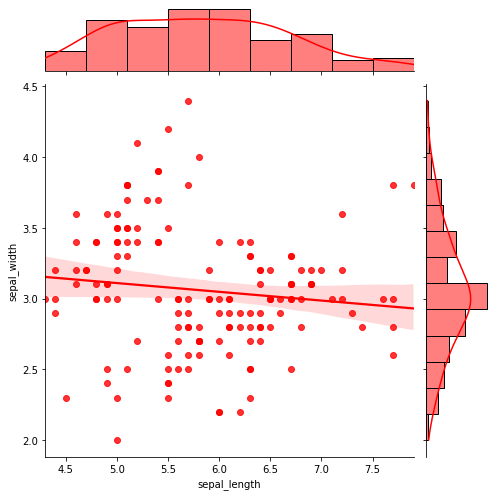

In [4]:
g = sns.jointplot("sepal_length",
                  "sepal_width", 
                  data=iris,
                  kind="reg",
                  color="r", size=7)

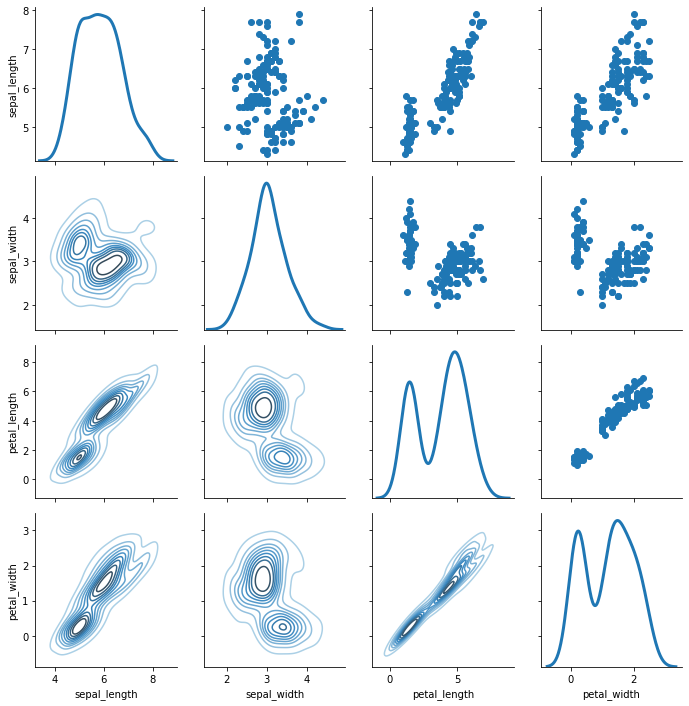

In [7]:
g = sns.PairGrid(iris, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

Этих инструментов достаточно чтобы решить большинство задач про базовый анализ данных. Попробуйте применить эти инструменты для своих данных. Если у вас не хватает идей, ищите их в интернете, вступайте в сообщество Open Data Science (оно живёт в слаке) и не ограничивайтесь русскоязычными ресурсами. 

## Закрепим основы Pandas

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Создадим DF

In [100]:
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.319339,0.635727,-0.557227,-0.303203
2013-01-02,0.470155,-0.531771,-1.054221,0.854868
2013-01-03,0.942104,1.851984,0.151428,-0.333586
2013-01-04,0.971650,-0.223680,0.114835,0.603906
2013-01-05,0.831362,0.406755,0.936408,-0.029448
2013-01-06,0.270054,-0.620325,1.611765,1.349647


In [ ]:
dates

In [ ]:
# другой способ создания фрейма данных


In [17]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : 'foo' })
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [18]:
df2.dtypes


A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [19]:
df.head()


,A,B,C,D
2013-01-01,-1.494041,-0.540676,-1.326629,-1.377935
2013-01-02,-0.906235,0.217109,0.212703,-0.411998
2013-01-03,0.367117,0.639206,0.723134,0.905469
2013-01-04,0.222985,-1.010566,-0.267296,0.482384
2013-01-05,1.973465,-0.066339,-0.564357,1.172169


In [20]:
df.index


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
df.values


array([[-1.49404075, -0.54067573, -1.32662886, -1.37793509],
       [-0.90623506,  0.21710876,  0.2127028 , -0.4119983 ],
       [ 0.36711713,  0.6392064 ,  0.72313403,  0.90546931],
       [ 0.2229846 , -1.01056586, -0.26729609,  0.48238367],
       [ 1.97346481, -0.06633854, -0.5643572 ,  1.17216936],
       [ 1.13711366,  0.40065235,  0.42878834,  1.00472176]])

In [23]:
# quick data summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.216734,-0.060102,-0.132276,0.295802
std,1.276218,0.618473,0.747922,0.997945
min,-1.494041,-1.010566,-1.326629,-1.377935
25%,-0.623930,-0.422091,-0.490092,-0.188403
50%,0.295051,0.075385,-0.027297,0.693926
75%,0.944615,0.354766,0.374767,0.979909
max,1.973465,0.639206,0.723134,1.172169


In [ ]:
Мы можем транспонировать индекс и столбцы.

In [24]:
df.T


,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.494041,-0.906235,0.367117,0.222985,1.973465,1.137114
B,-0.540676,0.217109,0.639206,-1.010566,-0.066339,0.400652
C,-1.326629,0.212703,0.723134,-0.267296,-0.564357,0.428788
D,-1.377935,-0.411998,0.905469,0.482384,1.172169,1.004722


In [99]:
# axis 0 is index, axis 1 is columns
df.sort_index(axis=1, ascending=False)

,Unnamed: 1,Totem_Laurier,Rachel1,PierDup,Parc,Mais2,Mais1,D,CSC,Berri1,A
Date,,,,,,,,,,,
2013-01-01,00:00,0,1,0,6,0,1,5,0,0,0.0
2013-01-02,00:00,0,2,0,18,0,13,5,0,69,NaN
2013-01-03,00:00,0,0,1,22,6,21,5,2,69,NaN
2013-01-04,00:00,0,125,0,16,4,22,5,0,80,NaN
2013-01-05,00:00,0,97,0,12,3,19,5,4,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2013-09-14,00:00,2456,3277,1075,979,2911,1706,5,1494,2488,NaN
2013-09-15,00:00,2527,3623,1459,1804,2933,1417,5,1749,2243,NaN
2013-09-16,00:00,3012,4307,855,3272,5485,2799,5,2466,4206,NaN


In [116]:
# Можно сортировать по значениям
df.sort(columns='B')

AttributeError: 'DataFrame' object has no attribute 'sort'

##### Будьте внимательны когда копипастите код! Код может устареть

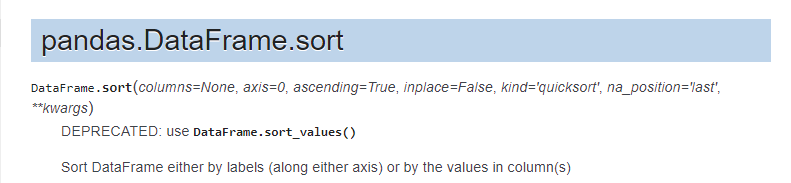

In [28]:

df.sort_values('B')

,A,B,C,D
2013-01-04,0.222985,-1.010566,-0.267296,0.482384
2013-01-01,-1.494041,-0.540676,-1.326629,-1.377935
2013-01-05,1.973465,-0.066339,-0.564357,1.172169
2013-01-02,-0.906235,0.217109,0.212703,-0.411998
2013-01-06,1.137114,0.400652,0.428788,1.004722
2013-01-03,0.367117,0.639206,0.723134,0.905469


###### Выборки

In [29]:
# выбераем столбец (и получаем серию)
df['A']

2013-01-01   -1.494041
2013-01-02   -0.906235
2013-01-03    0.367117
2013-01-04    0.222985
2013-01-05    1.973465
2013-01-06    1.137114
Freq: D, Name: A, dtype: float64

In [30]:
df.A

2013-01-01   -1.494041
2013-01-02   -0.906235
2013-01-03    0.367117
2013-01-04    0.222985
2013-01-05    1.973465
2013-01-06    1.137114
Freq: D, Name: A, dtype: float64

In [31]:
df[0:3]


,A,B,C,D
2013-01-01,-1.494041,-0.540676,-1.326629,-1.377935
2013-01-02,-0.906235,0.217109,0.212703,-0.411998
2013-01-03,0.367117,0.639206,0.723134,0.905469


In [32]:
df['20130102':'20130104']


,A,B,C,D
2013-01-02,-0.906235,0.217109,0.212703,-0.411998
2013-01-03,0.367117,0.639206,0.723134,0.905469
2013-01-04,0.222985,-1.010566,-0.267296,0.482384


Основное различие между loc и iloc заключается в следующем:
loc основан на метках (label), что означает, что вы должны указать строки и столбцы на основе их меток строк и столбцов .
iloc основан на целочисленной позиции, поэтому вы должны указать строки и столбцы по их целочисленным значениям позиции (целочисленная позиция на основе 0).

Вот некоторые различия и сходства между loc и iloc:

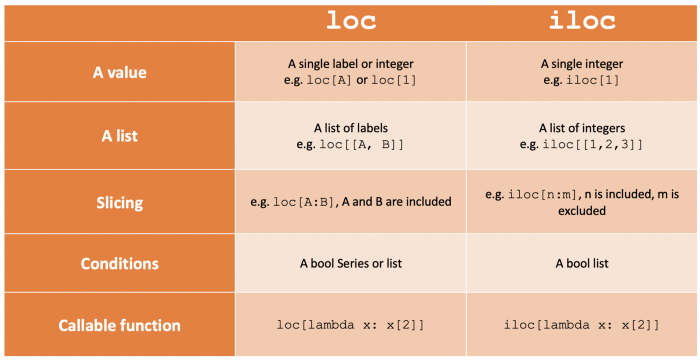

In [33]:
# cross-section using a label
df.loc[dates[0]]

A   -1.494041
B   -0.540676
C   -1.326629
D   -1.377935
Name: 2013-01-01 00:00:00, dtype: float64

In [34]:
# getting a scalar value
df.loc[dates[0], 'A']

-1.4940407521595247

In [35]:
# select via position
df.iloc[3]

A    0.222985
B   -1.010566
C   -0.267296
D    0.482384
Name: 2013-01-04 00:00:00, dtype: float64

In [36]:
df.iloc[3:5,0:2]


,A,B
2013-01-04,0.222985,-1.010566
2013-01-05,1.973465,-0.066339


In [37]:
# column slicing
df.iloc[:,1:3]

,B,C
2013-01-01,-0.540676,-1.326629
2013-01-02,0.217109,0.212703
2013-01-03,0.639206,0.723134
2013-01-04,-1.010566,-0.267296
2013-01-05,-0.066339,-0.564357
2013-01-06,0.400652,0.428788


In [38]:
# get a value by index
df.iloc[1,1]

0.21710875811007382

In [39]:
# boolean indexing
df[df.A > 0]

,A,B,C,D
2013-01-03,0.367117,0.639206,0.723134,0.905469
2013-01-04,0.222985,-1.010566,-0.267296,0.482384
2013-01-05,1.973465,-0.066339,-0.564357,1.172169
2013-01-06,1.137114,0.400652,0.428788,1.004722


In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,0.217109,0.212703,NaN
2013-01-03,0.367117,0.639206,0.723134,0.905469
2013-01-04,0.222985,NaN,NaN,0.482384
2013-01-05,1.973465,NaN,NaN,1.172169
2013-01-06,1.137114,0.400652,0.428788,1.004722


In [114]:
# фильтрация
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [115]:
df3

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.557227,5,one
2013-01-02,0.470155,-0.531771,-1.054221,5,one
2013-01-03,0.942104,1.851984,0.151428,5,two
2013-01-04,0.971650,-0.223680,0.114835,5,three
2013-01-05,0.831362,0.406755,0.936408,5,four
2013-01-06,0.270054,-0.620325,1.611765,5,three


In [43]:
df3[df3['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.367117,0.639206,0.723134,0.905469,two
2013-01-05,1.973465,-0.066339,-0.564357,1.172169,four


In [109]:
# setting examples
df.at[dates[0],'A'] = 0

df

,A,B,C,D
2013-01-01,0.000000,0.635727,-0.557227,-0.303203
2013-01-02,0.470155,-0.531771,-1.054221,0.854868
2013-01-03,0.942104,1.851984,0.151428,-0.333586
2013-01-04,0.971650,-0.223680,0.114835,0.603906
2013-01-05,0.831362,0.406755,0.936408,-0.029448
2013-01-06,0.270054,-0.620325,1.611765,1.349647


In [112]:
# Доступ к одному значению для пары строка/столбец по целочисленной позиции.
#Подобно ``iloc``, в том, что оба обеспечивают поиск на основе целых чисел. Используем
#``iat``, если вам нужно получить или установить только одно значение в DataFrame
df.iat[0,1] = 0
df


,A,B,C,D
2013-01-01,0.000000,0.000000,-0.557227,-0.303203
2013-01-02,0.470155,-0.531771,-1.054221,0.854868
2013-01-03,0.942104,1.851984,0.151428,-0.333586
2013-01-04,0.971650,-0.223680,0.114835,0.603906
2013-01-05,0.831362,0.406755,0.936408,-0.029448
2013-01-06,0.270054,-0.620325,1.611765,1.349647


In [113]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.557227,5
2013-01-02,0.470155,-0.531771,-1.054221,5
2013-01-03,0.942104,1.851984,0.151428,5
2013-01-04,0.971650,-0.223680,0.114835,5
2013-01-05,0.831362,0.406755,0.936408,5
2013-01-06,0.270054,-0.620325,1.611765,5


In [108]:
# работа с отсутствующими данными
df4 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df4

,A,B,C,D,E
2013-01-01,1.319339,0.635727,-0.557227,-0.303203,NaN
2013-01-02,0.470155,-0.531771,-1.054221,0.854868,NaN
2013-01-03,0.942104,1.851984,0.151428,-0.333586,NaN
2013-01-04,0.971650,-0.223680,0.114835,0.603906,NaN


In [106]:
df4.loc[dates[0]:dates[1],'E'] = 1


In [107]:
df4

,A,B,C,D,E
2013-01-01,1.319339,0.635727,-0.557227,-0.303203,1.0
2013-01-02,0.470155,-0.531771,-1.054221,0.854868,1.0
2013-01-03,0.942104,1.851984,0.151428,-0.333586,NaN
2013-01-04,0.971650,-0.223680,0.114835,0.603906,NaN


In [47]:
# удалить строки с отсутствующими данными
df4.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.326629,5,1.0
2013-01-02,-0.906235,0.217109,0.212703,5,1.0


In [48]:
# заполним недостающие данные
df4.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.326629,5,1.0
2013-01-02,-0.906235,0.217109,0.212703,5,1.0
2013-01-03,0.367117,0.639206,0.723134,5,5.0
2013-01-04,0.222985,-1.010566,-0.267296,5,5.0


In [49]:
# boolean маска для значений nan
pd.isnull(df4)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


###### Operations


In [101]:
df.mean()


A    0.800777
B    0.253115
C    0.200498
D    0.357031
dtype: float64

In [102]:
# pivot the mean calculation
df.mean(1)

2013-01-01    0.273659
2013-01-02   -0.065242
2013-01-03    0.652983
2013-01-04    0.366678
2013-01-05    0.536269
2013-01-06    0.652785
Freq: D, dtype: float64

In [103]:
# выравнивание объектов с разными размерами
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [104]:
df.sub(s,axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.057896,0.851984,-0.848572,-1.333586
2013-01-04,-2.028350,-3.223680,-2.885165,-2.396094
2013-01-05,-4.168638,-4.593245,-4.063592,-5.029448
2013-01-06,NaN,NaN,NaN,NaN


In [53]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.326629,5
2013-01-02,-0.906235,0.217109,0.212703,5
2013-01-03,0.367117,0.639206,0.723134,5
2013-01-04,0.222985,-1.010566,-0.267296,5
2013-01-05,1.973465,-0.066339,-0.564357,5
2013-01-06,1.137114,0.400652,0.428788,5


In [54]:
# Функция apply
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.326629,5
2013-01-02,-0.906235,0.217109,-1.113926,10
2013-01-03,-0.539118,0.856315,-0.390792,15
2013-01-04,-0.316133,-0.154251,-0.658088,20
2013-01-05,1.657331,-0.220589,-1.222445,25
2013-01-06,2.794445,0.180063,-0.793657,30


In [55]:
df.apply(lambda x: x.max() - x.min())


A    2.879700
B    1.649772
C    2.049763
D    0.000000
dtype: float64

###### Merging / Grouping 


In [58]:
# Конкатенация
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.657160,0.152619,2.855945,1.427320
1,0.521586,0.269327,-0.280380,-0.151719
2,0.243478,-0.478959,1.958695,-0.316956
3,-1.164605,1.316943,-1.951566,-1.232985
4,-0.034284,0.535223,0.543992,-0.783565
5,0.869032,0.445665,-0.444627,0.309111
6,0.089258,-1.313889,0.112343,-0.596906
7,0.232761,-0.358213,-0.196600,-0.188178
8,-0.181231,-0.815295,-0.134814,-0.013985
9,-0.719978,-0.175084,0.210139,0.516705


In [59]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,1.657160,0.152619,2.855945,1.427320
1,0.521586,0.269327,-0.280380,-0.151719
2,0.243478,-0.478959,1.958695,-0.316956
3,-1.164605,1.316943,-1.951566,-1.232985
4,-0.034284,0.535223,0.543992,-0.783565
5,0.869032,0.445665,-0.444627,0.309111
6,0.089258,-1.313889,0.112343,-0.596906
7,0.232761,-0.358213,-0.196600,-0.188178
8,-0.181231,-0.815295,-0.134814,-0.013985
9,-0.719978,-0.175084,0.210139,0.516705


In [60]:
# SQL-style join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [62]:
left

,key,lval
0,foo,1
1,foo,2


In [61]:
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [64]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]

In [65]:
df

,A,B,C,D
0,-0.546801,-0.325317,1.284365,-0.492398
1,-1.155243,1.236686,0.261941,1.142686
2,0.510897,1.874582,0.409901,0.902910
3,-1.737089,-0.218935,0.378861,0.198130
4,-0.847503,-0.211771,-0.551329,-0.778722
5,1.863431,0.712694,0.604924,0.627795
6,-0.955772,-0.965556,-0.156617,-0.413806
7,0.172384,0.720038,-1.327348,-1.094124


In [66]:
s

A   -1.737089
B   -0.218935
C    0.378861
D    0.198130
Name: 3, dtype: float64

In [68]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.546801,-0.325317,1.284365,-0.492398
1,-1.155243,1.236686,0.261941,1.142686
2,0.510897,1.874582,0.409901,0.902910
3,-1.737089,-0.218935,0.378861,0.198130
4,-0.847503,-0.211771,-0.551329,-0.778722
5,1.863431,0.712694,0.604924,0.627795
6,-0.955772,-0.965556,-0.156617,-0.413806
7,0.172384,0.720038,-1.327348,-1.094124
8,-1.737089,-0.218935,0.378861,0.198130


In [69]:
df = pd.DataFrame(
    { 'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
      'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
      'C' : np.random.randn(8),
      'D' : np.random.randn(8) })
df

,A,B,C,D
0,foo,one,-1.539966,-0.077662
1,bar,one,-0.404343,-0.523760
2,foo,two,-0.087610,-0.703396
3,bar,three,-1.828636,0.096283
4,foo,two,-0.456745,2.575912
5,bar,two,-2.230176,-1.898568
6,foo,one,0.805791,0.511243
7,foo,three,-1.121885,-0.232034


In [70]:
# Группировка
df.groupby('A').sum()

,C,D
A,,
bar,-4.463154,-2.326045
foo,-2.400416,2.074063


In [71]:
# Группировка по нескольким столбцам
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.404343 -0.523760
    three -1.828636  0.096283
    two   -2.230176 -1.898568
foo one   -0.734175  0.433581
    three -1.121885 -0.232034
    two   -0.544355  1.872516

In [72]:
df = pd.DataFrame(
    { 'A' : ['one', 'one', 'two', 'three'] * 3,
      'B' : ['A', 'B', 'C'] * 4,
      'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
      'D' : np.random.randn(12),
      'E' : np.random.randn(12)} )
df

,A,B,C,D,E
0,one,A,foo,0.443116,-0.432132
1,one,B,foo,1.447184,-0.185070
2,two,C,foo,0.358852,-0.305351
3,three,A,bar,-1.184709,1.120005
4,one,B,bar,0.312398,-0.165385
5,one,C,bar,0.266996,1.649515
6,two,A,foo,0.002097,1.419873
7,three,B,foo,0.971678,0.277417
8,one,C,foo,-0.700168,0.370721
9,one,A,bar,-0.415801,-1.317642


In [74]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])


C             bar       foo
A     B                    
one   A -0.415801  0.443116
      B  0.312398  1.447184
      C  0.266996 -0.700168
three A -1.184709       NaN
      B       NaN  0.971678
      C  0.039396       NaN
two   A       NaN  0.002097
      B -0.844247       NaN
      C       NaN  0.358852

###### Plotting

<AxesSubplot:>

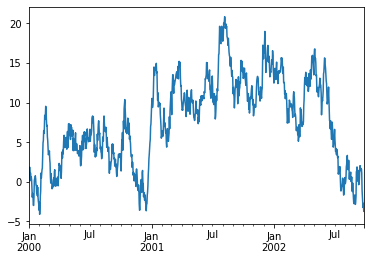

In [77]:
# time series plot
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

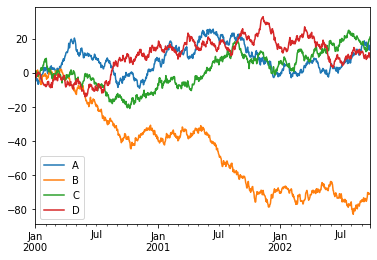

In [78]:
# plot with a data frame
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

###### Input / Output


In [ ]:
# Запиись в csc
df.to_csv('foo.csv', index=False)

In [ ]:
# Чтение нового файла
path = r'C:\Users\John\Documents\IPython Notebooks\foo.csv'
newDf = pd.read_csv(path)
newDf.head()

In [ ]:
# Уадление через знакомую вам уже библиотеку
import os
os.remove(path)

In [ ]:
# Тоже самое мы можем сделать через Эксель
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [ ]:
newDf2 = pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
newDf2.head()

###### Вкусности

In [79]:
from IPython.display import HTML, SVG, YouTubeVideo


In [80]:
HTML('''
<table style="border: 2px solid black;">
''' +
     ''.join(['<tr>' +
              ''.join([f'<td>{row},{col}</td>'
                       for col in range(5)]) +
              '</tr>' for row in range(5)]) +
     '''
</table>
''')

"0,0","0,1","0,2","0,3","0,4"
"1,0","1,1","1,2","1,3","1,4"
"2,0","2,1","2,2","2,3","2,4"
"3,0","3,1","3,2","3,3","3,4"
"4,0","4,1","4,2","4,3","4,4"


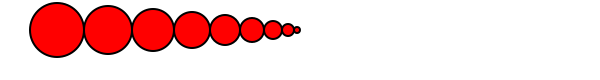

In [81]:
SVG('''<svg width="600" height="80">''' +
    ''.join([f'''<circle
              cx="{(30 + 3*i) * (10 - i)}"
              cy="30"
              r="{3. * float(i)}"
              fill="red"
              stroke-width="2"
              stroke="black">
        </circle>''' for i in range(10)]) +
    '''</svg>''')

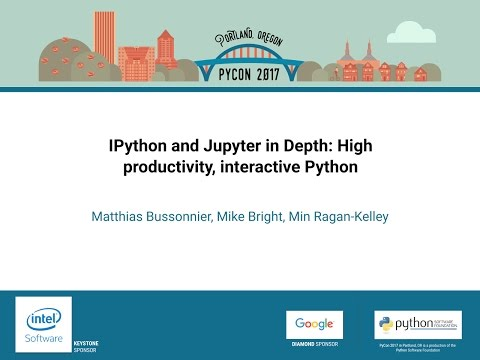

In [82]:
YouTubeVideo('VQBZ2MqWBZI')


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
url = ("https://raw.githubusercontent.com/"
       "ipython-books/cookbook-2nd-data/"
       "master/bikes.csv")

In [86]:
df = pd.read_csv(url, index_col='Date',
                 parse_dates=True, dayfirst=True)

In [87]:
df.head(2)


,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0


<AxesSubplot:xlabel='Date'>

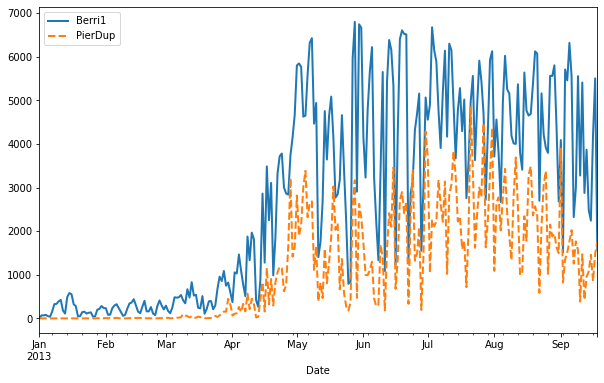

In [88]:
df[['Berri1', 'PierDup']].plot(figsize=(10, 6),
                               style=['-', '--'],
                               lw=2)

In [90]:
df_week = df.groupby(df.index.weekday).sum()


In [91]:
df_week


,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,
0,106826,51646,68087,129982,69767,44500,119211,72883
1,117244,54656,76974,141217,74299,40679,123533,76559
2,120434,59604,79033,145860,80437,42564,125173,79501
3,115193,52340,76273,141424,73668,36349,120684,74540
4,105701,44252,71605,127526,64385,36850,118556,71426
5,75754,27226,45947,79743,35544,46149,97143,56438
6,74873,29181,40812,75746,37620,53812,100735,53798


<ipython-input-92-043028d60828>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


(0.0, 151791.7)

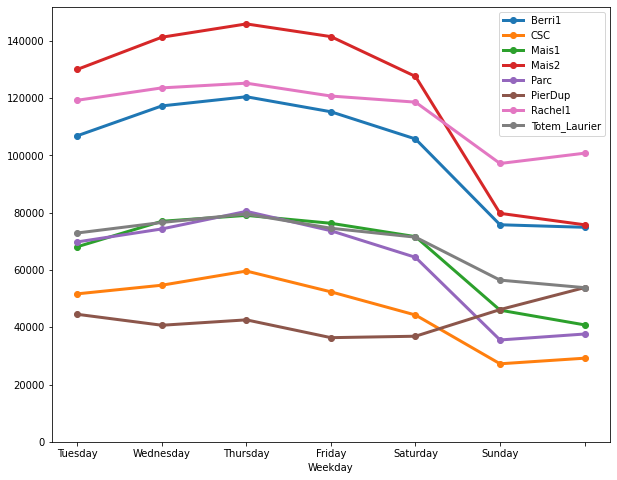

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_week.plot(style='-o', lw=3, ax=ax)
ax.set_xlabel('Weekday')
# We replace the labels 0, 1, 2... by the weekday
# names.
ax.set_xticklabels(
    ('Monday,Tuesday,Wednesday,Thursday,'
     'Friday,Saturday,Sunday').split(','))
ax.set_ylim(0)  # Set the bottom axis to 0.

In [93]:
from ipywidgets import interact

@interact
def plot(n=(1, 30)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    df['Berri1'].rolling(window=n).mean().plot(ax=ax)
    ax.set_ylim(0, 7000)
    plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

# ДЗ

###### Задача 1 Связанные списки

Напишите функцию (пусть онабудет называться reverse_linked_list), которая разворачивает связный список. На вход она принимает головную ноду, а на выход отдаёт хвостовую ноду исходного списка, но только теперь если попробовать пройтись по ней, она будет новой головной. С функцией из примера выше,



In [ ]:
print_linked_list(h)
h = reverse_linked_list(h)
print("---")
print_linked_list(h)

Напечатает



In [ ]:
[Node with value 1]
[Node with value 2]
[Node with value 3]
[Node with value Внезапно]
[Node with value 5]
---
[Node with value 5]
[Node with value Внезапно]
[Node with value 3]
[Node with value 2]
[Node with value 1]

Подсказка: вам понадобится "вспомогательная нода", куда вы будете переворачивать список. Можете написать вспомотаельную функцию которая "переворачивает ноду".



###### Задача 2 Пузырьки

Сортировкой пузырьком это один из самых простейших алгоритмов сортировки, который можно придумать. В базовом виде он подразумеват вложенный цикл и реализуется как-то так



In [ ]:
l = [2, 4, 1, 1, 2, 0]

for i in range(len(l)):
    for j in range(i, len(l)):
        if l[i] > l[j]:
            l[i], l[j] = l[j], l[i]

print(l)

Вам предлагается написать функцию, которая будет на вход получать голову несортированного связного списка, а на выход возвращать голову отсортированного.



Подсказка: так как в задании ничего не сказано про то, как должна вести себя функция, можете считать что можно просто менять значения, которые лежат в нодах, без замены их указателей. Или можете написать вспомогательную функцию, которая будет менять две ноды местами.



Эта задачка вполне может показаться вам запутанной и сложной. Но я советую всё равно её решить.



Ну ладно. В общем, такого рода задачки это типичные задачки которые стоит порешать, если вы серьёзно хотите примерить на себя шляпу программиста. Там помимо таких конструкций как вот эти вот связные списки будет ещё много чего другого интересно, например бинарные деревья, куча и хэш-таблицы (и много чего другого). Решение задачек на обработку таких структур доставляет своё изощрённое удовольствие. Не отказываете себе в нём // DA

###### Задача 3 Pandas

1) Выясните, сколько в среднем выходи полный счёт по пятницам на ланч у курящих мужчин (датасет tips)


2) Загрузите iris и посмотрите разбросы по всем числовым значениям для всех трёх классов цветов (датасет iris)


3) Создайте новый столбец с плотностью населения. Переименуйте названия первого и третьего столбца на русский язык

In [ ]:
df = pd.DataFrame({
     'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
     'population': [17.04, 143.5, 9.5, 45.5],
     'square': [2724902, 17125191, 207600, 603628]
 })

In [ ]:
df['density']